<a href="https://colab.research.google.com/github/camelenchon/projetos/blob/main/case_tecnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Técnico – Coordenação de Clusterização**
### Desenvolver um modelo preditivo para identificar se um cliente que está com seus produtos de crédito em atraso irá renegociar sua dívida no mês seguinte.

#Importações e Configurações Inicial


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib #Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #utilizada para fazer o OneMatEncoding
from sklearn.metrics import ( mean_absolute_error, mean_squared_error, precision_score, recall_score,
                             f1_score, accuracy_score, roc_auc_score, confusion_matrix)  #metricas
from imblearn import under_sampling, over_sampling  # Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados



#Carregamento e Exploração de dados

In [ ]:
#Carregamento da planilha
df = pd.read_csv('/content/drive/MyDrive/dados_clientes_case.csv')

In [ ]:
#Explorando os dados

#Primeiras linhas
df.head()

,anomes_abt,id_cliente,nome,idade,tempo_de_conta_em_anos,segmento,att_vinculo_empregaticio,vinculo_empregaticio,salario_estimado,saldo_em_conta,reng_ult_3_meses,contato_ult_3meses,qtd_contratos_em_atraso,saldo_em_atraso,combo_produtos_em_atraso,maior_atraso,renegociou_no_mes_seguinte
0,202303,537139309,Yago Garcia,44,26,IA,0,Empregado,9625.148028,2665.266182,0,0,3,29435.495566,"VEICULO, IMOBILIARIO",67,1
1,202303,131542946,Paulo Ramos,60,42,IA,0,Desempregado,0.000000,49.881538,0,1,1,28760.080955,"CARTAO, IMOBILIARIO",48,0
2,202304,364174171,Paulo Araújo,45,27,IU,0,Empregado,18806.655134,7124.703715,1,0,5,15660.488152,"IMOBILIARIO, VEICULO",40,1
3,202302,917508336,Ana Carolina Ferreira,64,46,IA,0,Autônomo,21911.466804,26575.020468,0,0,2,19686.230575,CARTAO,66,0
4,202302,577175772,Anna Liz Ferreira,65,47,IA,1,Desempregado,NaN,932.363741,1,0,2,22483.299949,"IMOBILIARIO, VEICULO",50,0


In [ ]:
#Informaçoes gerais sobre o DataFrame:

#Conjunto de dados
df.shape


(80000, 17)

In [ ]:
#Visão gerao do conjunto de dados
df.head()

,anomes_abt,id_cliente,nome,idade,tempo_de_conta_em_anos,segmento,att_vinculo_empregaticio,vinculo_empregaticio,salario_estimado,saldo_em_conta,reng_ult_3_meses,contato_ult_3meses,qtd_contratos_em_atraso,saldo_em_atraso,combo_produtos_em_atraso,maior_atraso,renegociou_no_mes_seguinte
0,202303,537139309,Yago Garcia,44,26,IA,0,Empregado,9625.148028,2665.266182,0,0,3,29435.495566,"VEICULO, IMOBILIARIO",67,1
1,202303,131542946,Paulo Ramos,60,42,IA,0,Desempregado,0.000000,49.881538,0,1,1,28760.080955,"CARTAO, IMOBILIARIO",48,0
2,202304,364174171,Paulo Araújo,45,27,IU,0,Empregado,18806.655134,7124.703715,1,0,5,15660.488152,"IMOBILIARIO, VEICULO",40,1
3,202302,917508336,Ana Carolina Ferreira,64,46,IA,0,Autônomo,21911.466804,26575.020468,0,0,2,19686.230575,CARTAO,66,0
4,202302,577175772,Anna Liz Ferreira,65,47,IA,1,Desempregado,NaN,932.363741,1,0,2,22483.299949,"IMOBILIARIO, VEICULO",50,0


In [ ]:
#Verifica os valores nulos
df.isnull().sum()

,0
anomes_abt,0
id_cliente,0
nome,0
idade,0
tempo_de_conta_em_anos,0
segmento,0
att_vinculo_empregaticio,0
vinculo_empregaticio,0
salario_estimado,8150
saldo_em_conta,5709


In [ ]:
#Informações básicas e seus tipos de variáveis
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   anomes_abt                  80000 non-null  int64  
 1   id_cliente                  80000 non-null  int64  
 2   nome                        80000 non-null  object 
 3   idade                       80000 non-null  int64  
 4   tempo_de_conta_em_anos      80000 non-null  int64  
 5   segmento                    80000 non-null  object 
 6   att_vinculo_empregaticio    80000 non-null  int64  
 7   vinculo_empregaticio        80000 non-null  object 
 8   salario_estimado            71850 non-null  float64
 9   saldo_em_conta              74291 non-null  float64
 10  reng_ult_3_meses            80000 non-null  int64  
 11  contato_ult_3meses          80000 non-null  int64  
 12  qtd_contratos_em_atraso     80000 non-null  int64  
 13  saldo_em_atraso             800

In [ ]:
#Total de valores únicos de cada variável
valores_unicos = []
for i in df.columns[0:17].tolist():
  print(i, ':' ,len(df[i].astype(str).value_counts()))
  valores_unicos.append(len(df[i].astype(str).value_counts()))

anomes_abt : 6
id_cliente : 79997
nome : 38081
idade : 57
tempo_de_conta_em_anos : 57
segmento : 3
att_vinculo_empregaticio : 2
vinculo_empregaticio : 3
salario_estimado : 57490
saldo_em_conta : 74292
reng_ult_3_meses : 2
contato_ult_3meses : 2
qtd_contratos_em_atraso : 5
saldo_em_atraso : 80000
combo_produtos_em_atraso : 15
maior_atraso : 120
renegociou_no_mes_seguinte : 2


In [ ]:
#Visualiza as medidas estatísticas
df.describe()

,anomes_abt,id_cliente,idade,tempo_de_conta_em_anos,att_vinculo_empregaticio,salario_estimado,saldo_em_conta,reng_ult_3_meses,contato_ult_3meses,qtd_contratos_em_atraso,saldo_em_atraso,maior_atraso,renegociou_no_mes_seguinte
count,80000.00000,8.000000e+04,80000.000000,80000.000000,80000.000000,71850.000000,74291.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,202303.50175,5.509725e+08,39.791375,21.794950,0.100237,10367.537275,3846.907754,0.228475,0.298875,2.995462,25568.309690,60.647850,0.280737
std,1.70873,2.599357e+08,14.845449,14.844907,0.300318,8789.516445,5280.353378,0.419853,0.457768,1.416348,14149.073295,34.717506,0.449362
min,202301.00000,1.000102e+08,16.000000,-1.000000,0.000000,0.000000,0.194118,0.000000,0.000000,1.000000,1000.073588,1.000000,0.000000
25%,202302.00000,3.262205e+08,28.000000,10.000000,0.000000,3063.193408,811.614323,0.000000,0.000000,2.000000,13321.450257,31.000000,0.000000
50%,202304.00000,5.517185e+08,34.000000,16.000000,0.000000,8362.889540,2003.665244,0.000000,0.000000,3.000000,25565.252453,61.000000,0.000000
75%,202305.00000,7.770601e+08,52.000000,34.000000,0.000000,17023.466017,4551.642700,0.000000,1.000000,4.000000,37841.761967,91.000000,1.000000
max,202306.00000,9.999934e+08,72.000000,55.000000,1.000000,31201.204326,32541.848277,1.000000,1.000000,5.000000,49999.470471,120.000000,1.000000


In [ ]:
#Ver o maior e menor saldo em atraso
print('Maior saldo em atraso:', df['saldo_em_atraso'].max())
print('Menor saldo em atraso:', df['saldo_em_atraso'].min())

Maior saldo em atraso: 49999.470471193046
Menor saldo em atraso: 1000.0735878552624


In [ ]:
#Ver a maior e menor idade com divida em atraso
print('Maior idade com dívida em atraso:', df['idade'].max())
print('Menor idade com dívida em atraso:', df['idade'].min())

Maior idade com dívida em atraso: 72
Menor idade com dívida em atraso: 16


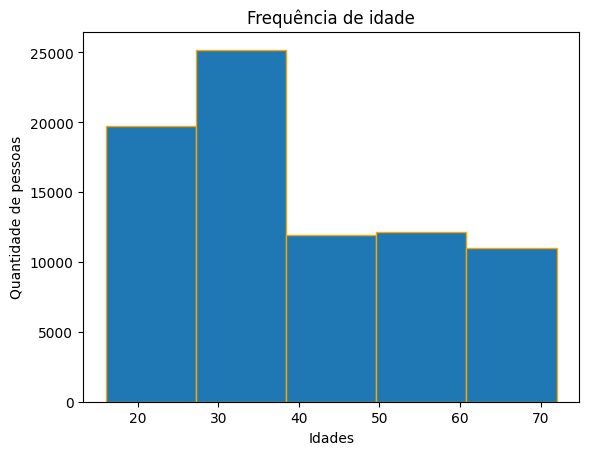

In [ ]:
#Histograma pra ver a frequência de idade
hist_idades = plt.hist(df['idade'], bins=5, edgecolor='orange')
plt.xlabel('Idades')
plt.ylabel('Quantidade de pessoas')
plt.title('Frequência de idade')
plt.show()

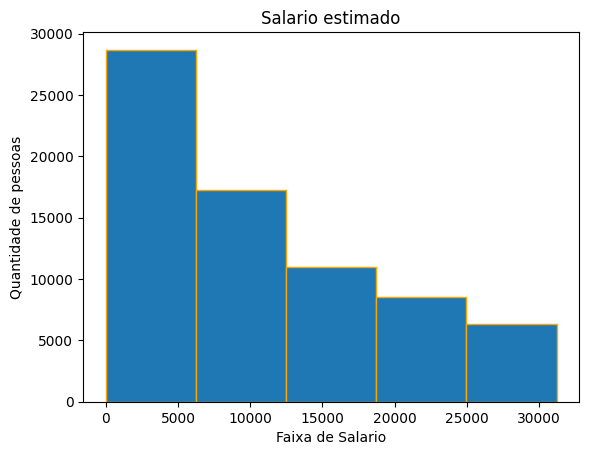

In [ ]:
#Histograma pra ver a Salario estimado
hist_idades = plt.hist(df['salario_estimado'], bins=5, edgecolor='orange')
plt.xlabel('Faixa de Salario')
plt.ylabel('Quantidade de pessoas')
plt.title('Salario estimado')
plt.show()

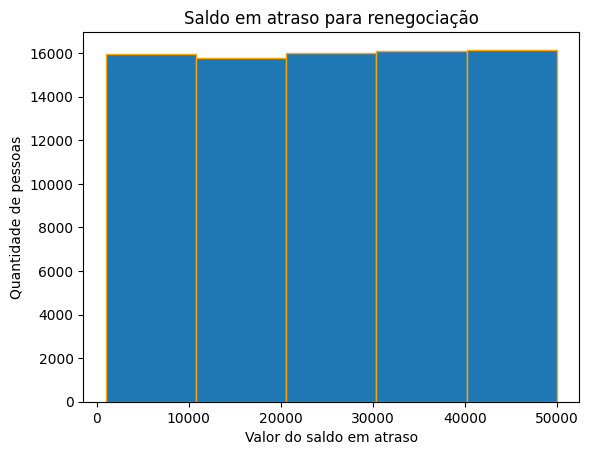

In [ ]:
#Histograma pra ver o saldo da dívida que esta em atraso
hist_idades = plt.hist(df['saldo_em_atraso'], bins=5, edgecolor='orange')
plt.xlabel('Valor do saldo em atraso')
plt.ylabel('Quantidade de pessoas')
plt.title('Saldo em atraso para renegociação')
plt.show()

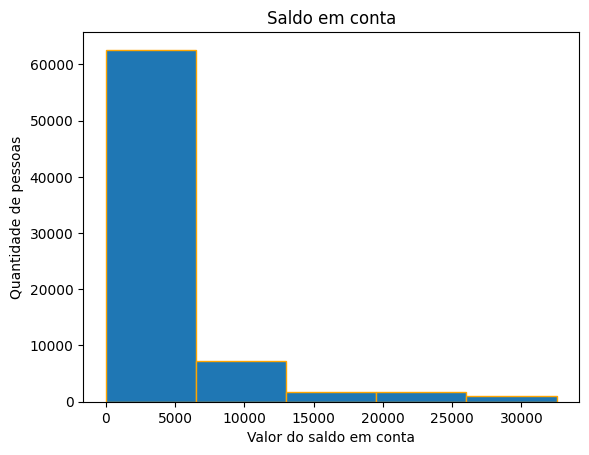

In [ ]:
#Histograma pra ver o saldo em conta
hist_idades = plt.hist(df['saldo_em_conta'], bins=5, edgecolor='orange')
plt.xlabel('Valor do saldo em conta')
plt.ylabel('Quantidade de pessoas')
plt.title('Saldo em conta')
plt.show()

In [ ]:
#ver o agrupamento do saldo em conta
df.groupby(['saldo_em_conta']).size()

,0
saldo_em_conta,
0.194118,1
0.222639,1
0.248914,1
0.293357,1
0.365567,1
...,...
31784.159143,1
31801.731736,1
31989.039385,1


In [ ]:
#ver a média do saldo em conta
df['saldo_em_conta'].mean()

3846.90775365518

In [ ]:
#Ver a média do saldo em atraso
saldo_em_atraso = df['saldo_em_atraso']
saldo_em_atraso.mean()



25568.309690120466

In [ ]:
#Ver o valor minimo que existe em atraso
saldo_em_atraso.min()


1000.0735878552624

In [ ]:
#Ver o valor maximo que existe em atraso
saldo_em_atraso.max()

49999.470471193046

In [ ]:
#Variavel saldo_em_atraso agrupada
df.groupby(['saldo_em_atraso']).size()

,0
saldo_em_atraso,
1000.073588,1
1000.373188,1
1001.612663,1
1001.797671,1
1001.874031,1
...,...
49997.847654,1
49998.382796,1
49998.596231,1


In [ ]:
#Variavel alvo que precisa ser balanceada no pré-processamento
df.groupby(['renegociou_no_mes_seguinte']).size()

,0
renegociou_no_mes_seguinte,
0,57541
1,22459


#Análise exploratória dos dados

In [ ]:
#Verifica os valores nulos
df.isnull().sum()

,0
anomes_abt,0
id_cliente,0
nome,0
idade,0
tempo_de_conta_em_anos,0
segmento,0
att_vinculo_empregaticio,0
vinculo_empregaticio,0
salario_estimado,8150
saldo_em_conta,5709


In [ ]:
#Substitui os valores nulos de 'Salario Estimado' pela média dos valores
df['salario_estimado'] = df['salario_estimado'].fillna(df['salario_estimado'].mean())

In [ ]:
#Substitui os valores nulos de 'Saldo em conta' pela média dos valores
df['saldo_em_conta'] = df['saldo_em_conta'].fillna(df['saldo_em_conta'].mean())

In [ ]:
df.isnull().sum()

,0
anomes_abt,0
id_cliente,0
nome,0
idade,0
tempo_de_conta_em_anos,0
segmento,0
att_vinculo_empregaticio,0
vinculo_empregaticio,0
salario_estimado,0
saldo_em_conta,0


In [ ]:
#Criando faixa de idade para utilizar no modelo preditivo
bins= [15,30,45,60,75]
labels = ['16-30', '31-45','46-60','61-75']
df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels)
pd.value_counts(df.faixa_etaria)

<ipython-input-28-62c5c6e0327a>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.faixa_etaria)


,count
faixa_etaria,
16-30,29535
31-45,23023
46-60,16464
61-75,10978


In [ ]:
#Criando faixa de saldo em conta para utilizar no modelo preditivo
bins= [0,1000,5000,10000,20000,40000]
labels = ['0-1000', '1001-5000','5001-10000','10001-20000','20001-40000']
df['faixa_saldo_em_conta'] = pd.cut(df['saldo_em_conta'], bins=bins, labels=labels)
pd.value_counts(df.faixa_saldo_em_conta)

<ipython-input-29-33cba8baa361>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.faixa_saldo_em_conta)


,count
faixa_saldo_em_conta,
1001-5000,38888
0-1000,24399
5001-10000,10804
10001-20000,3255
20001-40000,2654


In [ ]:
#Criando faixa de saldo em atraso para usar no modelo preditivo
bins = [0, 5000, 10000, 20000,40000, 500000]
labels = ['0-5000','5000-10000','10001-20000','20001-40000','40001-50000']
df['faixa_saldo_atraso'] = pd.cut(df['saldo_em_atraso'], bins=bins,labels=labels)
pd.value_counts(df.faixa_saldo_atraso)

<ipython-input-30-b31910bf3543>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.faixa_saldo_atraso)


,count
faixa_saldo_atraso,
20001-40000,32772
40001-50000,16479
10001-20000,16058
5000-10000,8214
0-5000,6477


In [ ]:
#Ver as colunas que vão ser usadas no modelo preditivo
colunas = ['faixa_etaria', 'att_vinculo_empregaticio',
           'vinculo_empregaticio', 'faixa_saldo_em_conta',
           'reng_ult_3_meses', 'contato_ult_3meses', 'qtd_contratos_em_atraso',
           'faixa_saldo_atraso', 'renegociou_no_mes_seguinte']

df_dados = pd.DataFrame(df, columns=colunas)

In [ ]:
#Ver todas informaçoes das colunas das variáveis que vão ser usadas no modelo preditivo
df_dados.head()

,faixa_etaria,att_vinculo_empregaticio,vinculo_empregaticio,faixa_saldo_em_conta,reng_ult_3_meses,contato_ult_3meses,qtd_contratos_em_atraso,faixa_saldo_atraso,renegociou_no_mes_seguinte
0,31-45,0,Empregado,1001-5000,0,0,3,20001-40000,1
1,46-60,0,Desempregado,0-1000,0,1,1,20001-40000,0
2,31-45,0,Empregado,5001-10000,1,0,5,10001-20000,1
3,61-75,0,Autônomo,20001-40000,0,0,2,10001-20000,0
4,61-75,1,Desempregado,0-1000,1,0,2,20001-40000,0


In [ ]:
#Ver a quantidade das colunas e linhas das variáveis que vão ser usadas no modelo preditivo
df_dados.shape

(80000, 9)

In [ ]:
#Ver as informações detalhadas do DataFrame
df_dados.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   faixa_etaria                80000 non-null  category
 1   att_vinculo_empregaticio    80000 non-null  int64   
 2   vinculo_empregaticio        80000 non-null  object  
 3   faixa_saldo_em_conta        80000 non-null  category
 4   reng_ult_3_meses            80000 non-null  int64   
 5   contato_ult_3meses          80000 non-null  int64   
 6   qtd_contratos_em_atraso     80000 non-null  int64   
 7   faixa_saldo_atraso          80000 non-null  category
 8   renegociou_no_mes_seguinte  80000 non-null  int64   
dtypes: category(3), int64(5), object(1)
memory usage: 3.9+ MB


In [ ]:
#Ver se há dados nulos no DataFrame que vai ser usado no modelo preditivo
df_dados.isnull().sum()

,0
faixa_etaria,0
att_vinculo_empregaticio,0
vinculo_empregaticio,0
faixa_saldo_em_conta,0
reng_ult_3_meses,0
contato_ult_3meses,0
qtd_contratos_em_atraso,0
faixa_saldo_atraso,0
renegociou_no_mes_seguinte,0


#Analise exploratórias - variáveis categóricas

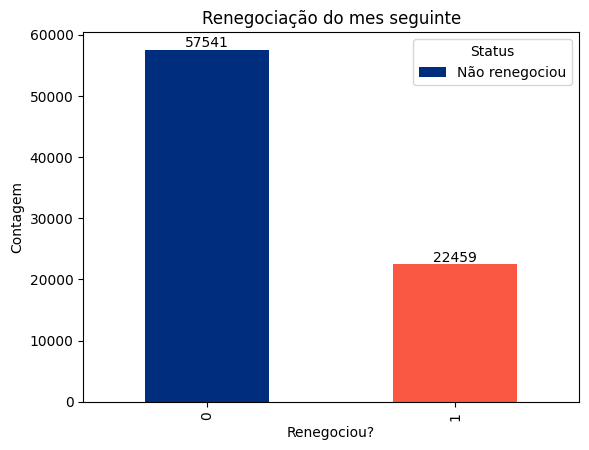

In [ ]:
#Analisando a variavel alvo
ax = df_dados.renegociou_no_mes_seguinte.value_counts().plot(
    kind='bar',
    title='Renegociação do mes seguinte',
    color= ['#002d7e', '#fb5843'])
ax.set_xlabel('Renegociou?')
ax.set_ylabel('Contagem')
plt.legend(['Não renegociou', 'Renegociou'], title='Status')
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )
plt.show()

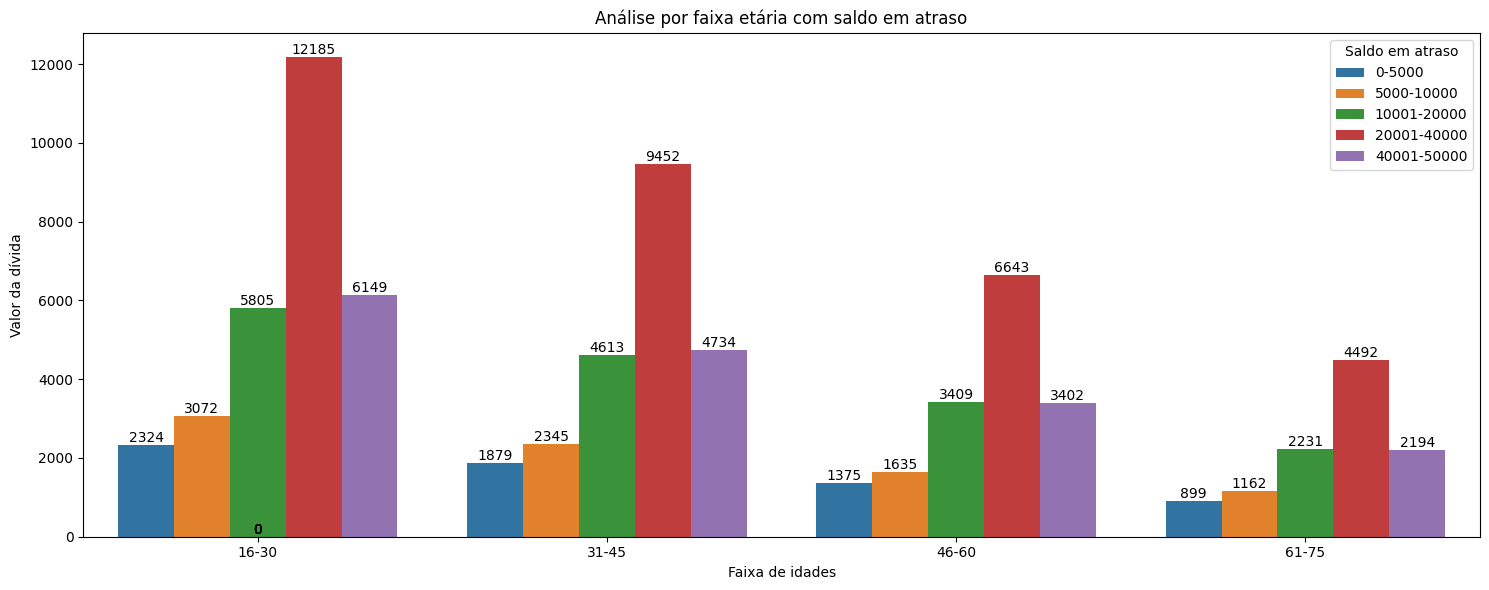

In [ ]:
#Analise de faixa etaria com saldo em atraso
plt.rcParams["figure.figsize"] = [15.00, 6.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(data = df_dados, x = "faixa_etaria", hue ="faixa_saldo_atraso" )
ax.set_xlabel('Faixa de idades')
ax.set_ylabel('Valor da dívida')
plt.legend(title='Saldo em atraso')
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )
plt.title('Análise por faixa etária com saldo em atraso')
plt.show()

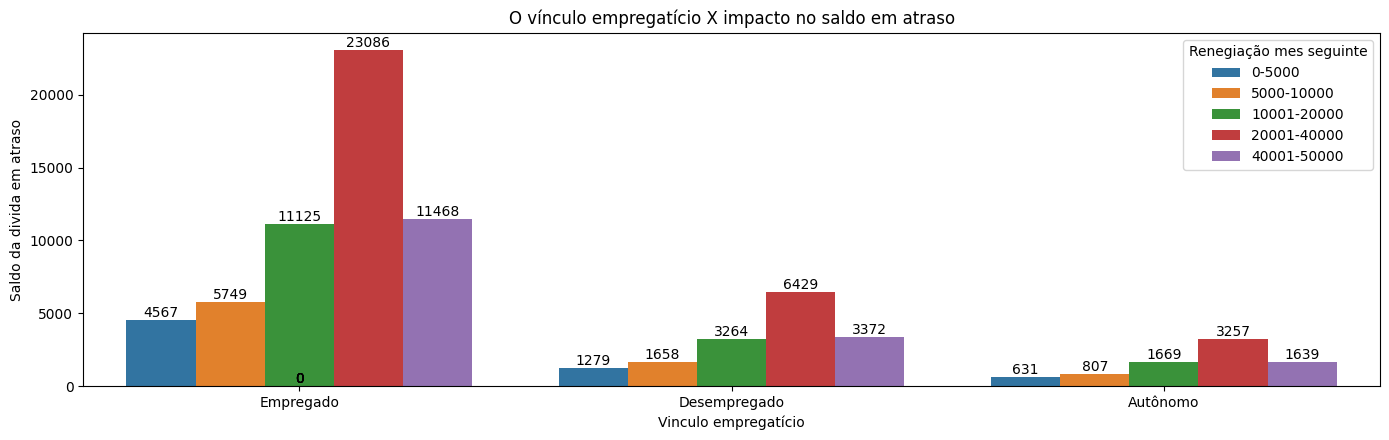

In [ ]:
# Analise do vinculo empregaticio no saldo em atraso

plt.rcParams["figure.figsize"] = [14.00, 4.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(data = df_dados, x = "vinculo_empregaticio", hue ="faixa_saldo_atraso" )
ax.set_xlabel('Vinculo empregatício')
ax.set_ylabel('Saldo da divida em atraso')
plt.legend(title='Renegiação mes seguinte')
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )
plt.title('O vínculo empregatício X impacto no saldo em atraso')
plt.show()

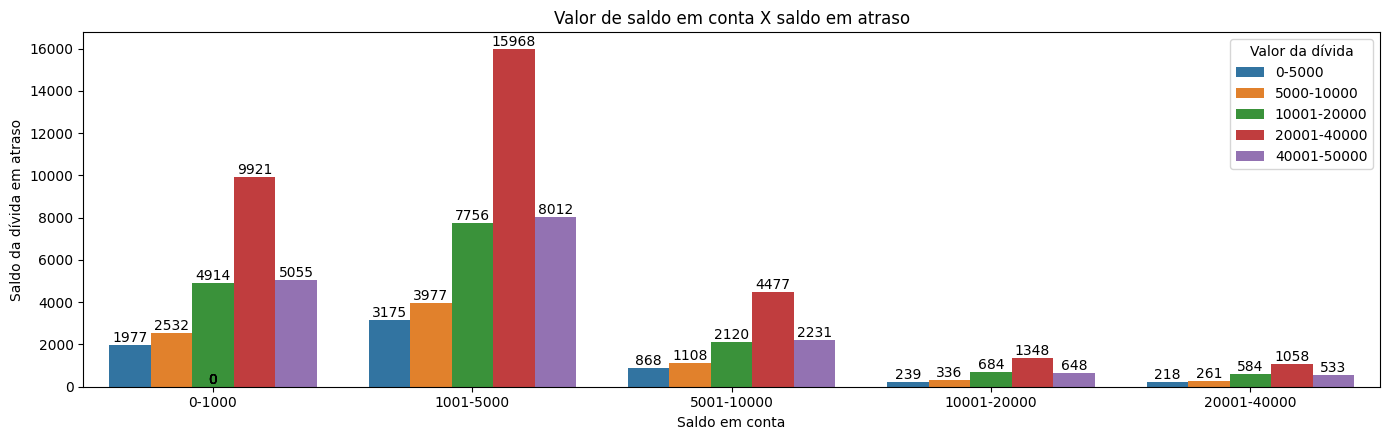

In [ ]:
# Analise do valor de saldo em conta X saldo em atraso

plt.rcParams["figure.figsize"] = [14.00, 4.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(data = df_dados, x = "faixa_saldo_em_conta", hue ="faixa_saldo_atraso" )
ax.set_xlabel('Saldo em conta')
ax.set_ylabel('Saldo da dívida em atraso')
plt.legend(title='Valor da dívida')
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )
plt.title('Valor de saldo em conta X saldo em atraso')
plt.show()

#Análise exploratória das variáveis númericas

In [ ]:
#Todas informações do DataFrame
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   faixa_etaria                80000 non-null  category
 1   att_vinculo_empregaticio    80000 non-null  int64   
 2   vinculo_empregaticio        80000 non-null  object  
 3   faixa_saldo_em_conta        80000 non-null  category
 4   reng_ult_3_meses            80000 non-null  int64   
 5   contato_ult_3meses          80000 non-null  int64   
 6   qtd_contratos_em_atraso     80000 non-null  int64   
 7   faixa_saldo_atraso          80000 non-null  category
 8   renegociou_no_mes_seguinte  80000 non-null  int64   
dtypes: category(3), int64(5), object(1)
memory usage: 3.9+ MB


In [ ]:
# Carregar valores numericos
variaveis_numericas = []
for i in df_dados.columns[0:9].tolist():
  if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':
    variaveis_numericas.append(i)

In [ ]:
variaveis_numericas

['att_vinculo_empregaticio',
 'reng_ult_3_meses',
 'contato_ult_3meses',
 'qtd_contratos_em_atraso',
 'renegociou_no_mes_seguinte']

In [ ]:
#Quantidade de váriaveis
len(variaveis_numericas)

5

In [ ]:
#Carregar variaveis categoricas para OneHotEncoding
variaveis_categoricas = []
for i in df_dados.columns[0:9].tolist():
  if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':
    variaveis_categoricas.append(i)

In [ ]:
variaveis_categoricas

['faixa_etaria',
 'vinculo_empregaticio',
 'faixa_saldo_em_conta',
 'faixa_saldo_atraso']

In [ ]:
#Cria o encoder e aplica o OneHotEncoder - transforma a variavel que esta em object e category em número
lb = LabelEncoder()

for var in variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])

In [ ]:
df_dados.head()

,faixa_etaria,att_vinculo_empregaticio,vinculo_empregaticio,faixa_saldo_em_conta,reng_ult_3_meses,contato_ult_3meses,qtd_contratos_em_atraso,faixa_saldo_atraso,renegociou_no_mes_seguinte
0,1,0,2,2,0,0,3,2,1
1,2,0,1,0,0,1,1,2,0
2,1,0,2,4,1,0,5,1,1
3,3,0,0,3,0,0,2,1,0
4,3,1,1,0,1,0,2,2,0


In [ ]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   faixa_etaria                80000 non-null  int64
 1   att_vinculo_empregaticio    80000 non-null  int64
 2   vinculo_empregaticio        80000 non-null  int64
 3   faixa_saldo_em_conta        80000 non-null  int64
 4   reng_ult_3_meses            80000 non-null  int64
 5   contato_ult_3meses          80000 non-null  int64
 6   qtd_contratos_em_atraso     80000 non-null  int64
 7   faixa_saldo_atraso          80000 non-null  int64
 8   renegociou_no_mes_seguinte  80000 non-null  int64
dtypes: int64(9)
memory usage: 5.5 MB


In [ ]:
#Visualizar a quantidade de variavel target(alvo) para o balanceamento
variavel_target = df_dados.renegociou_no_mes_seguinte.value_counts()
variavel_target

,count
renegociou_no_mes_seguinte,
0,57541
1,22459


In [ ]:
#Separar as variaveis preditoras e alvo
PREDITORAS = df_dados.iloc[:, 0:8]
TARGET = df_dados.iloc[:, 8]

In [ ]:
#Visualizar as variaveis preditoras
PREDITORAS.head()

,faixa_etaria,att_vinculo_empregaticio,vinculo_empregaticio,faixa_saldo_em_conta,reng_ult_3_meses,contato_ult_3meses,qtd_contratos_em_atraso,faixa_saldo_atraso
0,1,0,2,2,0,0,3,2
1,2,0,1,0,0,1,1,2
2,1,0,2,4,1,0,5,1
3,3,0,0,3,0,0,2,1
4,3,1,1,0,1,0,2,2


In [ ]:
#Visualizar as variaveis alvo
TARGET.head()

,renegociou_no_mes_seguinte
0,1
1,0
2,1
3,0
4,0


In [ ]:
#Seed para reproduzir o mesmo resultado
seed = 100

#Criar o balenceador SMOTE
balanceador = SMOTE(random_state = seed)

#Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS,TARGET)

<Axes: title={'center': 'Renegociação do mes seguinte'}, xlabel='renegociou_no_mes_seguinte'>

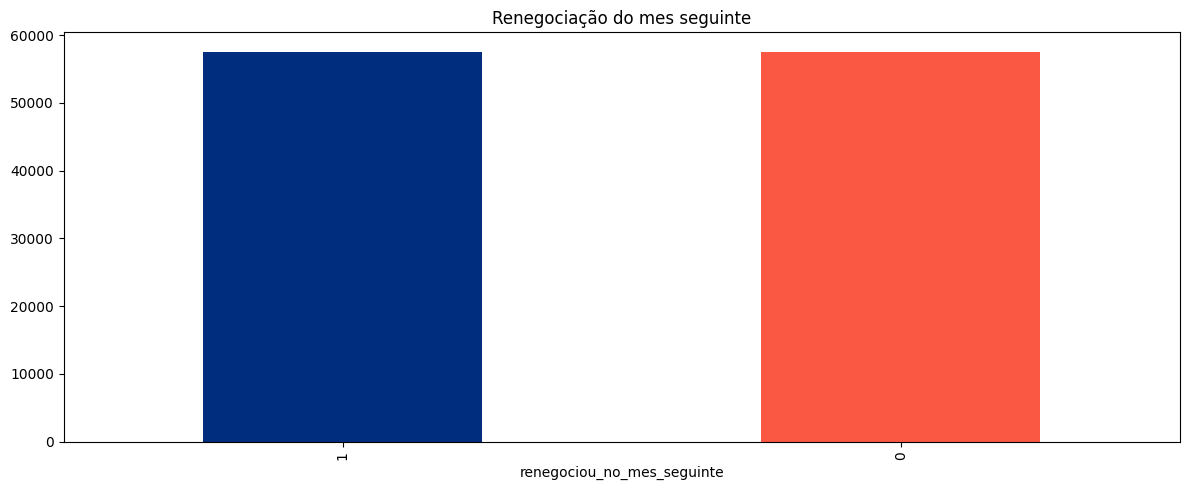

In [ ]:
#Visualizando o balanceamento da variavel TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
TARGET_RES.value_counts().plot(kind='bar', title='Renegociação do mes seguinte', color= ['#002d7e', '#fb5843'])

In [ ]:
#Quantidade de registros antes do balanceamento
PREDITORAS.shape

(80000, 8)

In [ ]:
#Quantidade de registros antes do balanceamento
TARGET.shape

(80000,)

In [ ]:
#Quantidade de registros após do balanceamento
PREDITORAS_RES.shape

(115082, 8)

In [ ]:
#Quantidade de registros após do balanceamento
TARGET_RES.shape

(115082,)

#Divisão dos dados e Treinamento e teste



In [ ]:
# Divisão os dados em conjuntos de treino e teste: 'X_treino' e 'Y_treino' para treinamento, e 'X_teste' e 'Y_teste' para teste,
# utilizando 30% dos dados para teste e garantindo reprodutibilidade com um valor fixo de 'random_state' de 42.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS_RES, TARGET_RES, test_size=0.3, random_state = 42)

In [ ]:
#Normalizando as variaveis - Pré processamento dos Dados
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.fit_transform(X_teste)

In [ ]:
#Visualizar a dimensão dos dados de treino
X_treino_normalizados.shape

(80557, 8)

In [ ]:
#Visualizar os dados de treino normalizados
X_treino_normalizados

array([[0.33333333, 0.        , 1.        , ..., 1.        , 0.75      ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.5       ,
        0.75      ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.75      ,
        0.75      ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.25      ,
        0.5       ],
       [0.33333333, 0.        , 0.5       , ..., 0.        , 0.25      ,
        0.        ],
       [0.66666667, 0.        , 1.        , ..., 1.        , 0.        ,
        0.5       ]])

In [ ]:
#Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators = 100)


In [ ]:
#Construçao de modelo
clf = clf.fit(X_treino_normalizados, Y_treino)

RandomForestClassifier()

In [ ]:
# #Veriricando a acuracia do modelo com dados de teste
scores = clf.score(X_teste_normalizados, Y_teste)
scores

0.6936133236784938

Text(0.5, 1.0, 'Importância de cada variável')

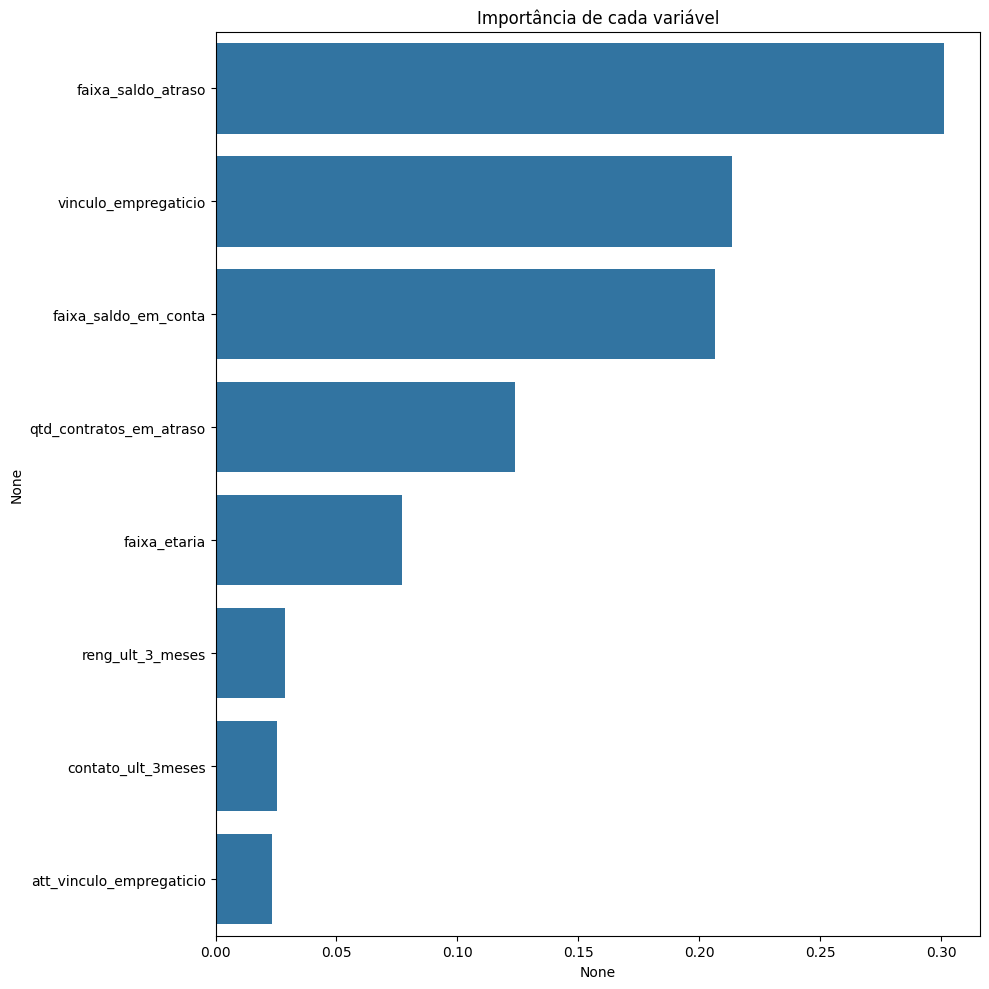

In [ ]:
#Exibindo a importancia de cada viariavel no modelo preditivo
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')

In [ ]:
importances.sort_values(ascending = False)

,0
faixa_saldo_atraso,0.300960
vinculo_empregaticio,0.213566
faixa_saldo_em_conta,0.206577
qtd_contratos_em_atraso,0.123990
faixa_etaria,0.077269
reng_ult_3_meses,0.028727
contato_ult_3meses,0.025616
att_vinculo_empregaticio,0.023294


In [ ]:
#Salvando o modelo criado e treinado
joblib.dump(clf, 'modelo_preditivo.pkl')

['modelo_preditivo.pkl']

#Preparar os testes


In [ ]:
#Carregar o modelo treinado
clf = joblib.load('modelo_preditivo.pkl')

In [ ]:
#importar os dados
df = pd.read_csv('/content/drive/MyDrive/dados_clientes_case.csv')

In [ ]:
#Substitui os valores nulos de 'Salario Estimado' pela média dos valores
df['salario_estimado'] = df['salario_estimado'].fillna(df['salario_estimado'].mean())

#Substitui os valores nulos de 'Saldo em conta' pela média dos valores
df['saldo_em_conta'] = df['saldo_em_conta'].fillna(df['saldo_em_conta'].mean())

#Criando faixa de idade para utilizar no modelo preditivo
bins= [15,30,45,60,75]
labels = ['16-30', '31-45','46-60','61-75']
df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels)
pd.value_counts(df.faixa_etaria)

#Criando faixa de saldo em conta para utilizar no modelo preditivo
bins= [0,1000,5000,10000,20000,40000]
labels = ['0-1000', '1001-5000','5001-10000','10001-20000','20001-40000']
df['faixa_saldo_em_conta'] = pd.cut(df['saldo_em_conta'], bins=bins, labels=labels)
pd.value_counts(df.faixa_saldo_em_conta)

#Criando faixa de saldo em atraso para usar no modelo preditivo
bins = [0, 5000, 10000, 20000,40000, 500000]
labels = ['0-5000','5000-10000','10001-20000','20001-40000','40001-50000']
df['faixa_saldo_atraso'] = pd.cut(df['saldo_em_atraso'], bins=bins,labels=labels)
pd.value_counts(df.faixa_saldo_atraso)

colunas =['faixa_etaria', 'att_vinculo_empregaticio',
           'vinculo_empregaticio', 'faixa_saldo_em_conta',
           'reng_ult_3_meses', 'contato_ult_3meses', 'qtd_contratos_em_atraso',
           'faixa_saldo_atraso', 'renegociou_no_mes_seguinte']
df_dados = pd.DataFrame(df, columns=colunas)

#Carregar variaveis categoricas para OneHotEncoding
variaveis_categoricas = []
for i in df_dados.columns[0:8].tolist():
  if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':
    variaveis_categoricas.append(i)

lb = LabelEncoder()

for var in variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])

#Separar as variaveis preditoras e alvo
PREDITORAS = df_dados.iloc[:, 0:8]

#Normalizando as variaveis
Normalizador = MinMaxScaler()
dados_normalizados = Normalizador.fit_transform(PREDITORAS)

previsoes = clf.predict(dados_normalizados)
probabilidades = clf.predict_proba(dados_normalizados)
df['PREVISOES'] = previsoes
df['PROBABILIDADES'] = probabilidades[:, 1]
df.head(15)



<ipython-input-134-c41bb2e6a881>:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.faixa_etaria)
<ipython-input-134-c41bb2e6a881>:17: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.faixa_saldo_em_conta)
<ipython-input-134-c41bb2e6a881>:23: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.faixa_saldo_atraso)


,anomes_abt,id_cliente,nome,idade,tempo_de_conta_em_anos,segmento,att_vinculo_empregaticio,vinculo_empregaticio,salario_estimado,saldo_em_conta,...,qtd_contratos_em_atraso,saldo_em_atraso,combo_produtos_em_atraso,maior_atraso,renegociou_no_mes_seguinte,faixa_etaria,faixa_saldo_em_conta,faixa_saldo_atraso,PREVISOES,PROBABILIDADES
0,202303,537139309,Yago Garcia,44,26,IA,0,Empregado,9625.148028,2665.266182,...,3,29435.495566,"VEICULO, IMOBILIARIO",67,1,31-45,1001-5000,20001-40000,1,0.576418
1,202303,131542946,Paulo Ramos,60,42,IA,0,Desempregado,0.000000,49.881538,...,1,28760.080955,"CARTAO, IMOBILIARIO",48,0,46-60,0-1000,20001-40000,0,0.155693
2,202304,364174171,Paulo Araújo,45,27,IU,0,Empregado,18806.655134,7124.703715,...,5,15660.488152,"IMOBILIARIO, VEICULO",40,1,31-45,5001-10000,10001-20000,1,0.513050
3,202302,917508336,Ana Carolina Ferreira,64,46,IA,0,Autônomo,21911.466804,26575.020468,...,2,19686.230575,CARTAO,66,0,61-75,20001-40000,10001-20000,1,0.855168
4,202302,577175772,Anna Liz Ferreira,65,47,IA,1,Desempregado,10367.537275,932.363741,...,2,22483.299949,"IMOBILIARIO, VEICULO",50,0,61-75,0-1000,20001-40000,0,0.017409
5,202303,356209196,Arthur Miguel Gonçalves,69,51,IU,0,Autônomo,10515.067881,1006.995073,...,4,15750.722936,"IMOBILIARIO, VEICULO",85,0,61-75,1001-5000,10001-20000,1,0.734556
6,202305,837058389,Catarina da Conceição,20,2,IA,0,Desempregado,0.000000,966.716329,...,1,43291.304418,"CARTAO, IMOBILIARIO",57,0,16-30,0-1000,40001-50000,0,0.035593
7,202305,507903732,Diogo Rezende,47,29,IA,1,Desempregado,10367.537275,393.686641,...,3,38764.052682,"IMOBILIARIO, CARTAO, VEICULO",62,0,46-60,0-1000,20001-40000,0,0.000000
8,202306,133473062,Rhavi Araújo,37,19,IP,0,Desempregado,0.000000,933.096445,...,4,34490.570575,"VEICULO, IMOBILIARIO, CARTAO",7,0,31-45,0-1000,20001-40000,0,0.018801
9,202305,890503688,Davi Miguel Leão,39,21,IP,0,Empregado,25823.709557,8442.032848,...,1,15199.356461,VEICULO,62,0,31-45,5001-10000,10001-20000,1,0.584857
